In [73]:
# import libralies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
"""
using a public domain dataset in kaggle.
"A/B test data"
https://www.kaggle.com/datasets/sergylog/ab-test-data

About Dataset
The site launched an A/B test in order to increase income. The excel file contains raw data on the results of the experiment (user_id), sample type (variant_name) and income brought by the user (revenue).
The task is to analyze the results of the experiment and write your recommendations.
"""

df = pd.read_csv('AB_Test_Results.csv')

In [75]:
# alpha number of successes:
prior_alpha = 20
# beta: number of failure:
prior_beta = 90

In [76]:
# test group controlled
control_true = df.loc[(df["VARIANT_NAME"]== "control")]["REVENUE"].sum()
control_false = len(df.loc[df["VARIANT_NAME"] == "control"]) - variant_true

In [77]:
# test group with psa
variant_true = df.loc[(df["VARIANT_NAME"]== "variant")]["REVENUE"].sum()
variant_false = len(df.loc[df["VARIANT_NAME"] == "variant"]) - variant_true

In [78]:
# simulate posterior distribution for controlled group
control_post = np.random.beta(prior_alpha + control_true, prior_beta + control_false, 10**4)

In [79]:
# simulate posterior distribution for variant group
variant_post = np.random.beta(prior_alpha + variant_true, prior_beta + variant_false, 10**4)

In [80]:
# calculating conversion rate
conversion_control = control_post.mean()
conversion_variant = variant_post.mean()
print(f"Conversion rate in Group Variant is ({round(conversion_variant * 100, 1)}%) while Control Group conversion rate is ({round(conversion_control * 100, 1)}%)")

Conversion rate in Group Variant is (7.3%) while Control Group conversion rate is (12.3%)


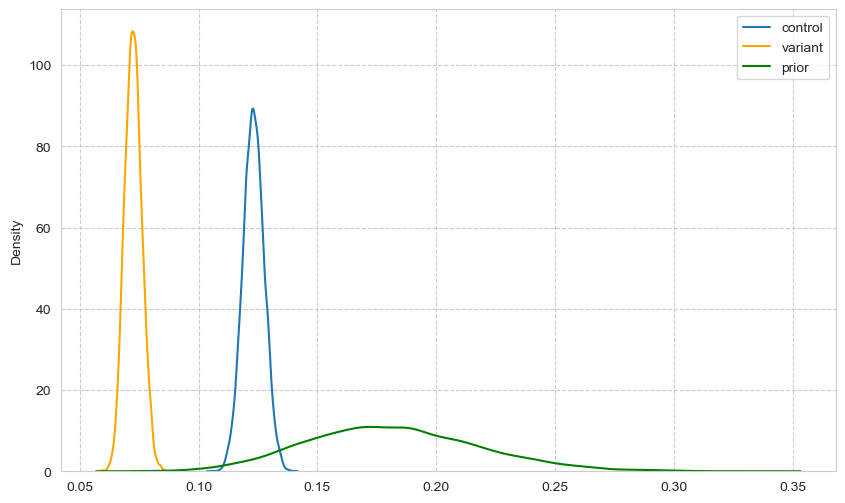

In [87]:
# visual comparison of Control Group and Variant Group

plt.figure(figsize = (10,6))
sns.set_style("whitegrid", {'grid.linestyle': '--'})

sns.kdeplot(control_post, label = "control")
sns.kdeplot(variant_post, color = "orange", label = "variant")

prior = np.random.beta(prior_alpha, prior_beta, 10**4)
sns.kdeplot(prior, color = "green", label = "prior")

plt.legend()
plt.show()

In [82]:
#  A/B test
diff = variant_post - control_post
# Lift:how much worse is Variant than Control:
lift = np.mean((variant_post - control_post)/control_post)

In [83]:
print(f"relative terms: Variant is {round(lift*100, 1)} % better than Control.")
improvement = diff.mean()*100
print("Expected improvement is ", round(improvement, 2), "% points")

relative terms: Variant is -41.0 % better than Control.
Expected improvement is  -5.06 % points
